In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Show plots inline
%matplotlib inline



In [4]:
dataset = pd.read_csv("./data/weatherww2/Summary_of_Weather.csv") # For Windows,we still use / for path
dataset.shape
dataset.axes


[RangeIndex(start=0, stop=119040, step=1),
 Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
        'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
        'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
        'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
       dtype='object')]

In [5]:
dataset[['MaxTemp','MinTemp']]

,MaxTemp,MinTemp
0,25.555556,22.222222
1,28.888889,21.666667
2,26.111111,22.222222
3,26.666667,22.222222
4,26.666667,21.666667
...,...,...
119035,28.333333,18.333333
119036,29.444444,18.333333
119037,28.333333,18.333333
119038,28.333333,18.333333


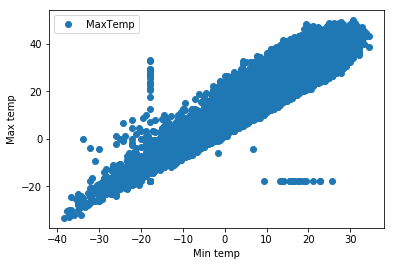

In [6]:
# Plot the features of interest

# Specify column names if using pandas to plot()
dataset.plot(x='MinTemp', y='MaxTemp', style='o') # o style gives a circle
plt.xlabel('Min temp')
plt.ylabel('Max temp')
plt.show()

In [ ]:
# Visualize the distribution of output label


In [7]:
# Prepare data for training
X = dataset['MinTemp'].values
y = dataset['MaxTemp'].values
print(X.shape,y.shape)

X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape,y.shape)

(119040,) (119040,)
(119040, 1) (119040, 1)


In [8]:
# sklean
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [9]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(95232, 1) (23808, 1) (95232, 1) (23808, 1)


In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(model.coef_)  # slope
print(model.intercept_) # y intercept 

[[0.92033997]]
[10.66185201]


In [12]:
y_pred = model.predict(X_test)
print(y_pred.shape)

(23808, 1)


In [13]:
df = pd.DataFrame({"predicted": y_pred.flatten(), "actual": y_test.flatten()})
df.head(25)

,predicted,actual
0,33.670351,28.888889
1,30.091251,31.111111
2,26.512151,27.222222
3,31.113851,28.888889
4,15.774852,23.333333
5,30.602551,37.222222
6,11.684452,22.222222
7,33.670351,35.555556
8,30.602551,30.555556
9,32.647751,28.888889


In [14]:
print(X_test.shape,y_test.shape)

(23808, 1) (23808, 1)


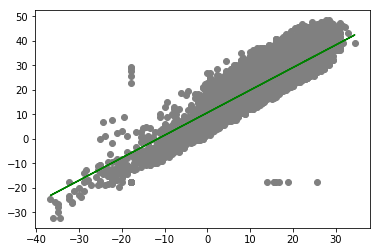

In [23]:
plt.scatter(X_test, y_test, color='grey') # expected plot
plt.plot(X_test, y_pred, color='green')  # actual plot
plt.show()

In [27]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mae,mse, rmse)
print(metrics.r2_score(y_test, y_pred))

3.1993291783785285 17.631568097568444 4.198996082109204
0.7670218843587764
